In [75]:
import meep as mp
import numpy as np

#parameter
a = 1 #zoom in rate of 1 μm.
period = 0.645*a
roa = 0.222
n_period = 19
fcen = 1/(0.98*a)
df = 0.15*fcen

n_groove_width = 5
groove_shift1 = a*period*np.array((((n_period/2),(n_period/2))))*np.array(((-1,0),(-0.5,0.5*np.sqrt(3)),(0.5,0.5*np.sqrt(3)),
                                                                         (1,0),(0.5,-0.5*np.sqrt(3)),(-0.5,-0.5*np.sqrt(3)),
                                                                         (-1,0)))
groove_shift2 = a*period*np.array(((n_period/2+n_groove_width),(n_period/2+n_groove_width)))*np.array(((-1,0),(-0.5,-0.5*np.sqrt(3)),(0.5,-0.5*np.sqrt(3)),
                                                                         (1,0),(0.5,0.5*np.sqrt(3)),(-0.5,0.5*np.sqrt(3)),
                                                                         (-1,0)))

dpml = 0.98/2*a
pml_layers = [mp.PML(dpml)]

resolution = 1/0.02  # pixels/μm

t_nclad = 1.5*a+dpml
t_active = 0.216*a
t_pclad = 0.36*a
t_gaas = 0.1*a
t_air = 0.5*a+dpml
t_etch = 1.6*a
sx = period*n_period+2*n_groove_width*period+0.5*a
sy = sx*3**0.5/2
sz = t_nclad+t_active+t_gaas+t_pclad+t_air

k_point = mp.Vector3(0,0,0)

#simulation
geo1 = [mp.Block(size=mp.Vector3(mp.inf,mp.inf,t_nclad),material=mp.Medium(index=3.2744),center=mp.Vector3(z=-sz/2+t_nclad/2)),
        mp.Block(size=mp.Vector3(mp.inf,mp.inf,t_active),material=mp.Medium(index=3.3799),center=mp.Vector3(z=-sz/2+t_nclad+t_active/2)),
        mp.Block(size=mp.Vector3(mp.inf,mp.inf,t_pclad),material=mp.Medium(index=3.2744),center=mp.Vector3(z=-sz/2+t_nclad+t_active+t_pclad/2)),
        mp.Block(size=mp.Vector3(mp.inf,mp.inf,t_gaas),material=mp.Medium(index=3.4824),center=mp.Vector3(z=-sz/2+t_nclad+t_active+t_pclad+t_gaas/2)),
        ]
vertices = [mp.Vector3(*_,z=sz/2-t_air-t_etch) for _ in groove_shift1.tolist()+groove_shift2.tolist()]
geo2 = [mp.Prism(vertices,height=t_etch,material=mp.Medium(index=1)),]

geometry = geo1+geo2

for num in np.arange(n_period/2+0.5,n_period,1):
    for _ in np.linspace(-(n_period-1)/2*period+(n_period-num)/2*period,(n_period-1)/2*period-(n_period-num)/2*period,int(num)):
        geometry.append(mp.Cylinder(roa*period,height=t_etch,center=mp.Vector3(x=_,y=(n_period-num)*period*3**0.5/2,z=sz/2-t_air-t_etch/2),material=mp.Medium(index=1)))

for num in np.arange(n_period/2+0.5,n_period+1,1):
    for _ in np.linspace(-(n_period-1)/2*period+(n_period-num)/2*period,(n_period-1)/2*period-(n_period-num)/2*period,int(num)):
        geometry.append(mp.Cylinder(roa*period,height=t_etch,center=mp.Vector3(x=_,y=-(n_period-num)*period*3**0.5/2,z=sz/2-t_air-t_etch/2),material=mp.Medium(index=1)))

sources = [mp.Source(src=mp.GaussianSource(fcen, fwidth=df),
                    component=mp.Hz,
                    center=mp.Vector3(x=0.05*sx,y=0.05*sy,z=-sz/2+t_nclad+t_active/2))]

cell = mp.Vector3(sx+2*dpml,sy+2*dpml,sz)

sim = mp.Simulation(resolution=resolution,
                    cell_size=cell,
                    geometry=geometry,
                    sources=sources,
                    boundary_layers=pml_layers,
                    k_point=k_point)

     block, center = (0,0,-0.833)
          size (1e+20,1e+20,1.99)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.7217,10.7217,10.7217)
     block, center = (0,0,0.27)
          size (1e+20,1e+20,0.216)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.4237,11.4237,11.4237)
     block, center = (0,0,0.558)
          size (1e+20,1e+20,0.36)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.7217,10.7217,10.7217)
     block, center = (0,0,0.788)
          size (1e+20,1e+20,0.1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12.1271,12.1271,12.1271)
     prism, center = (-1.10571,0,0.038)
          height 1.6, axis (0,0,1), sidewall angle: 0 radians, 14 vertices:
          (-6.1275,0,-0.762)
          (-3.06375,5.30657,-0.762)
          (3.06375,5.30657,-0.762)
          (6.1275,0,-0.762)
          (3.06375,-5.30

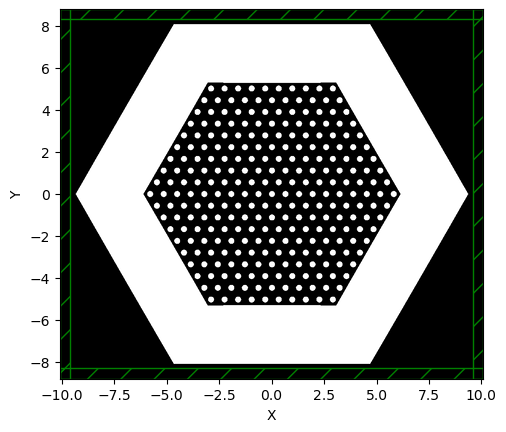

     block, center = (0,0,-0.833)
          size (1e+20,1e+20,1.99)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.7217,10.7217,10.7217)
     block, center = (0,0,0.27)
          size (1e+20,1e+20,0.216)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.4237,11.4237,11.4237)
     block, center = (0,0,0.558)
          size (1e+20,1e+20,0.36)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.7217,10.7217,10.7217)
     block, center = (0,0,0.788)
          size (1e+20,1e+20,0.1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12.1271,12.1271,12.1271)
     prism, center = (-1.10571,0,0.038)
          height 1.6, axis (0,0,1), sidewall angle: 0 radians, 14 vertices:
          (-6.1275,0,-0.762)
          (-3.06375,5.30657,-0.762)
          (3.06375,5.30657,-0.762)
          (6.1275,0,-0.762)
          (3.06375,-5.30

     block, center = (0,0,-0.833)
          size (1e+20,1e+20,1.99)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.7217,10.7217,10.7217)
     block, center = (0,0,0.27)
          size (1e+20,1e+20,0.216)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.4237,11.4237,11.4237)
     block, center = (0,0,0.558)
          size (1e+20,1e+20,0.36)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10.7217,10.7217,10.7217)
     block, center = (0,0,0.788)
          size (1e+20,1e+20,0.1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12.1271,12.1271,12.1271)
     prism, center = (-1.10571,0,0.038)
          height 1.6, axis (0,0,1), sidewall angle: 0 radians, 14 vertices:
          (-6.1275,0,-0.762)
          (-3.06375,5.30657,-0.762)
          (3.06375,5.30657,-0.762)
          (6.1275,0,-0.762)
          (3.06375,-5.30

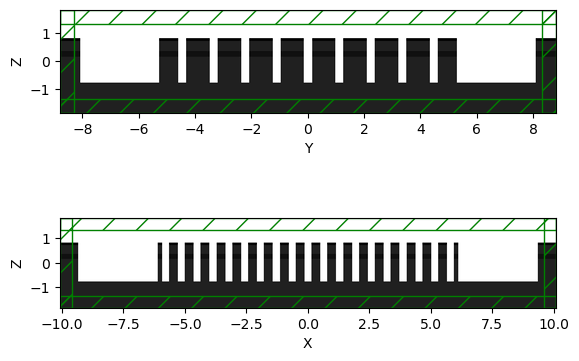

In [76]:
import matplotlib.pyplot as plt
ax1 = plt.subplot(111)
ax1 = mp.plot2D(sim, output_plane=mp.Volume(size=mp.Vector3(mp.inf,mp.inf), center=mp.Vector3(z=-sz/2+t_nclad+t_active+t_pclad/2)))
plt.show()
ax2 = plt.subplot(211)
ax2 = mp.plot2D(sim,output_plane=mp.Volume(size=mp.Vector3(0,mp.inf,mp.inf)))
ax3 = plt.subplot(212)
ax3 = mp.plot2D(sim,output_plane=mp.Volume(size=mp.Vector3(mp.inf,0,mp.inf)))
plt.show()
#plt.savefig('1.png',dpi=300)